# Motivation 
In this notebook we check the sanity of Time domain data and compute the psd of it 


In [3]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

In [5]:
# first impoort the paths from the config file
from config import settings
from pathlib import Path

settings_type = 'SETTINGS1'
data_path = Path(settings.data.path['raw'])
settings_config = settings.simulation[settings_type]
data_base_path = (data_path/settings_type/settings_type.lower()).with_suffix('.db')

In [23]:
n_samples = settings_config['simu_params']['t_end']/ settings_config['simu_params']['dt']
fs = 1/settings_config['simu_params']['dt']

In [19]:
# import the TDD_output from the database
import sqlite3
conn = sqlite3.connect(data_base_path)
c = conn.cursor()
c.execute("""SELECT TDD_output FROM simulation""")
TDD_output = np.frombuffer(c.fetchone()[0],dtype=np.float64)
# first impoort the paths from the config file
TDD_output=TDD_output.reshape((int(n_samples),-1))

In [21]:
def compute_psd(signal,fs,nperseg):
    f, psd = welch(signal, fs, nperseg=nperseg, scaling='spectrum')
    return f, psd

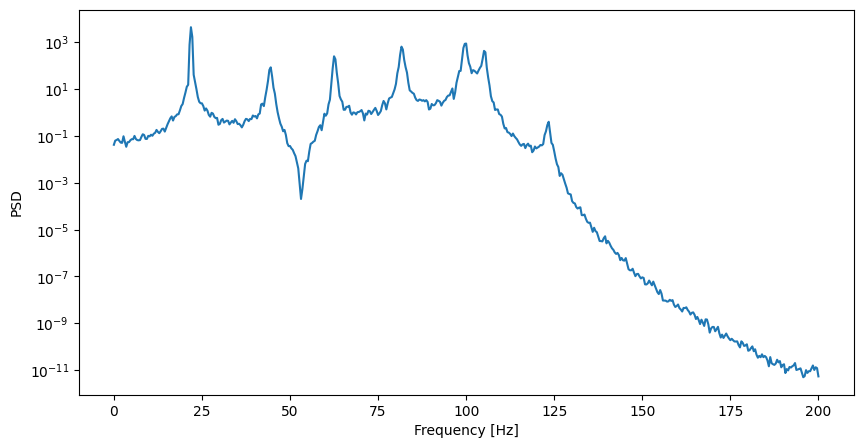

In [65]:
acc_7 = TDD_output[:,2*8+1]
vel_7 = TDD_output[:,1*8+1]
disp_7 = TDD_output[:,0*8+1]


f, psd = compute_psd(acc_7,fs,nperseg=1024)
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(f,psd)
ax.set_ylabel('PSD')
ax.set_xlabel('Frequency [Hz]')
ax.set_yscale('log')

In [60]:
# check is acc and disp and vel are consistent with derivation
# acc is derivative of vel and vel is derivative of disp
acc_7_check = np.diff(vel_7)*fs
vel_7_check = np.diff(disp_7)*fs


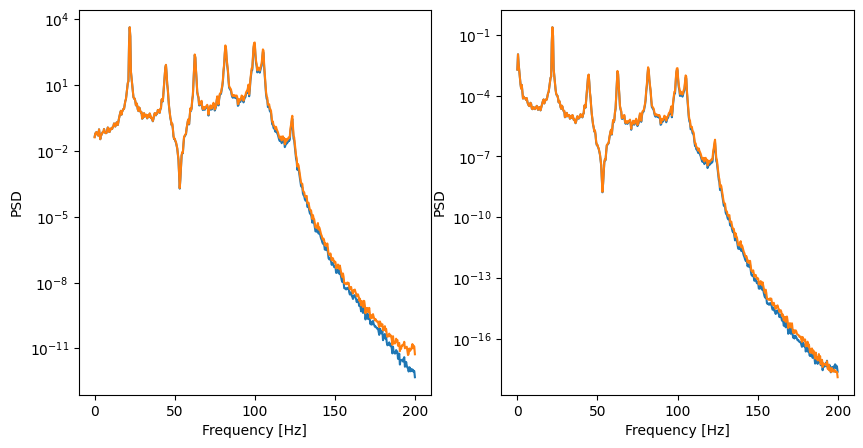

In [61]:
# now lets compare the psds of the acc and acc_check
f, psd_acc_check = compute_psd(acc_7_check,fs,nperseg=1024)
f, psd_acc = compute_psd(acc_7,fs,nperseg=1024)
f, psd_vel_check = compute_psd(vel_7_check,fs,nperseg=1024)
f, psd_vel = compute_psd(vel_7,fs,nperseg=1024)
fig,ax= plt.subplots(ncols=2,figsize=(10,5))
ax[0].plot(f,psd_acc_check)
ax[0].plot(f,psd_acc)
ax[1].plot(f,psd_vel_check)
ax[1].plot(f,psd_vel)
for i in range(2):
    ax[i].set_ylabel('PSD')
    ax[i].set_xlabel('Frequency [Hz]')
    ax[i].set_yscale('log')

